## Results metrics

A threshold "T" is used to classify a test case to be either a correct (true or positive) case or false (negative) case. If the case is below a threshold "T" then it is classified false (negative) and if it is above threshold "T" it is classified true (positive).

**FPIR**: is the false positive identification rate. It is the ratio of the test cases that are classified as true cases although they are false cases. It is type I error. 
FPIR= Number of test cases classified above threshold "T" (true) / Number of all test cases

**FNIR**: is the false negative identification rate. It is  the ratio of the test cases that are classified as false cases although they are true cases. It is type II error.
FNIR= Number of test cases classified below threshold "T" (false) / Number of all test cases

In [81]:
# Load libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
sns.set(style="white") 
%matplotlib inline
from torchvision import datasets, transforms


### AdaFace results

#### Load data - children

In [175]:
# File path
#file_path = '/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/master_thesis/saved_predictions/image_data_similarity_scores_ylfw.pt'
file_path = '../master_thesis/saved_predictions/similarity_scores_children_baseline1.pt'

# Load the file
data = torch.load(file_path)
data.keys()

dict_keys(['file_name', 'image_id', 'feature_vectors', 'similarity_scores'])

In [183]:
data["image_id"]

[0,
 1,
 2,
 3,
 3,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 7,
 8,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 12,
 13,
 14,
 14,
 14,
 15,
 16,
 16,
 17,
 18,
 18,
 18,
 18,
 19,
 20,
 21,
 22,
 23,
 23,
 24,
 24,
 24,
 25,
 25,
 26,
 27,
 27,
 28,
 29,
 29,
 30,
 31,
 31,
 32,
 32,
 32,
 33,
 34,
 34,
 35,
 35,
 35,
 36,
 36,
 37,
 37,
 38,
 38,
 38,
 38,
 38,
 39,
 39,
 40,
 40,
 40,
 41,
 41,
 41,
 42,
 43,
 43,
 44,
 45,
 45,
 46,
 46,
 47,
 48,
 48,
 48,
 49,
 49,
 50,
 51,
 52,
 52,
 53,
 53,
 53,
 53,
 53,
 54,
 54,
 55,
 55,
 55,
 56,
 57,
 57,
 57,
 58,
 58,
 59,
 60,
 60,
 60,
 60,
 60,
 61,
 61,
 61,
 61,
 62,
 62,
 62,
 63,
 64,
 65,
 65,
 66,
 67,
 67,
 68,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 75,
 76,
 77,
 77,
 78,
 78,
 79,
 80,
 81,
 82,
 82,
 83,
 83,
 83,
 84,
 85,
 86,
 87,
 88,
 88,
 89,
 89,
 90,
 90,
 90,
 90,
 91,
 92,
 92,
 93,
 94,
 94,
 94,
 94,
 94,
 95,
 96,
 97,
 98,
 99,
 99,
 99,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 106,
 107,
 107,
 107,
 107,
 10

In [176]:
len(data["feature_vectors"])

7

In [180]:
data["feature_vectors"]

[tensor([[-0.0541,  0.0452, -0.0315,  ..., -0.0170, -0.0797, -0.0256],
         [-0.0135,  0.0202, -0.0482,  ..., -0.0154,  0.0017,  0.0195],
         [-0.0599,  0.0667, -0.0193,  ...,  0.0489, -0.0212,  0.0114],
         ...,
         [-0.0106, -0.0196,  0.0502,  ..., -0.0454,  0.1407, -0.0602],
         [-0.0056,  0.0587, -0.0494,  ..., -0.0087, -0.0445, -0.0134],
         [-0.0308,  0.0345, -0.0332,  ..., -0.0018, -0.0826, -0.0192]]),
 tensor([[-0.0464,  0.0167,  0.0078,  ..., -0.0376, -0.0425, -0.0194],
         [ 0.0114, -0.0225,  0.0228,  ...,  0.0200, -0.0276,  0.0225],
         [-0.0189,  0.0349, -0.0245,  ...,  0.0408, -0.0617,  0.0050],
         ...,
         [ 0.0919,  0.0741,  0.0032,  ..., -0.0184,  0.0709, -0.0129],
         [-0.0048,  0.0493,  0.0404,  ..., -0.0017,  0.0169,  0.0010],
         [ 0.0055, -0.0161, -0.0111,  ...,  0.0273, -0.0362,  0.0110]]),
 tensor([[ 0.0010,  0.0532, -0.0378,  ...,  0.0956,  0.0145, -0.0293],
         [ 0.0176,  0.0403, -0.0048,  ...,  0

In [179]:
len(data["similarity_scores"][0])

3306

In [178]:
data["similarity_scores"][0]

tensor([[ 1.0000,  0.3533,  0.2804,  ..., -0.0971, -0.1725, -0.1341],
        [ 0.3533,  1.0000,  0.1601,  ..., -0.0362, -0.1086, -0.1297],
        [ 0.2804,  0.1601,  1.0000,  ...,  0.0147, -0.0779,  0.0526],
        ...,
        [-0.0971, -0.0362,  0.0147,  ...,  1.0000,  0.4589,  0.2357],
        [-0.1725, -0.1086, -0.0779,  ...,  0.4589,  1.0000,  0.5391],
        [-0.1341, -0.1297,  0.0526,  ...,  0.2357,  0.5391,  1.0000]])

In [181]:
set(data["image_id"])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


**False Negatives**
FNIR represent the proportion of feature vectors that belong to a certain class but are incorrectly classified as not belonging to that class.

In [184]:
feats = data["feature_vectors"]
sim_scores = torch.cat(feats) @ torch.cat(feats).T

In [185]:
sim_scores

tensor([[ 1.0000,  0.3533,  0.2804,  ..., -0.0971, -0.1725, -0.1341],
        [ 0.3533,  1.0000,  0.1601,  ..., -0.0362, -0.1086, -0.1297],
        [ 0.2804,  0.1601,  1.0000,  ...,  0.0147, -0.0779,  0.0526],
        ...,
        [-0.0971, -0.0362,  0.0147,  ...,  1.0000,  0.4589,  0.2357],
        [-0.1725, -0.1086, -0.0779,  ...,  0.4589,  1.0000,  0.5391],
        [-0.1341, -0.1297,  0.0526,  ...,  0.2357,  0.5391,  1.0000]])

In [186]:
# Analyze similarity scores in terms of threshold...

# For the first 10 similarity scores - what is the distribution of the scores?
sim_scores = data["similarity_scores"]


In [187]:
data["similarity_scores"]

tensor([[ 1.0000,  0.3533,  0.2804,  ..., -0.0971, -0.1725, -0.1341],
        [ 0.3533,  1.0000,  0.1601,  ..., -0.0362, -0.1086, -0.1297],
        [ 0.2804,  0.1601,  1.0000,  ...,  0.0147, -0.0779,  0.0526],
        ...,
        [-0.0971, -0.0362,  0.0147,  ...,  1.0000,  0.4589,  0.2357],
        [-0.1725, -0.1086, -0.0779,  ...,  0.4589,  1.0000,  0.5391],
        [-0.1341, -0.1297,  0.0526,  ...,  0.2357,  0.5391,  1.0000]])

In [188]:
plot_sims = sim_scores.detach().flatten().numpy()
len(plot_sims)

10929636

In [189]:
# # Example array
# plot_sims = np.array([0.9999999, 0.99994, 0.999, 0.99])

# # Tolerance level
# tolerance = 1e-4  # Adjust tolerance level as needed

# # Filter out values close to 1 using np.isclose()
# plot_sims_filtered = plot_sims[~np.isclose(plot_sims, 1.0, atol=tolerance)]
# plot_sims_filtered

In [190]:
## Data check


sim_scores = data["similarity_scores"]
# E.g. classify all identities as positive if threshold is higher than 90% of all similarity scores
sims_excluding_probe = sim_scores[sim_scores < 0.999999] # OBs check if more scientific way
# Check that length of similarity scores are equal to len(sim_scores.flatten)- len(sim_scores)
print("Length of similarity scores without probe: ", len(sims_excluding_probe), "Equal to: ", len(sim_scores.flatten()) - len(sim_scores), 
      "is",len(sims_excluding_probe) == (len(sim_scores.flatten()) - len(sim_scores)))


Length of similarity scores without probe:  10926330 Equal to:  10926330 is True


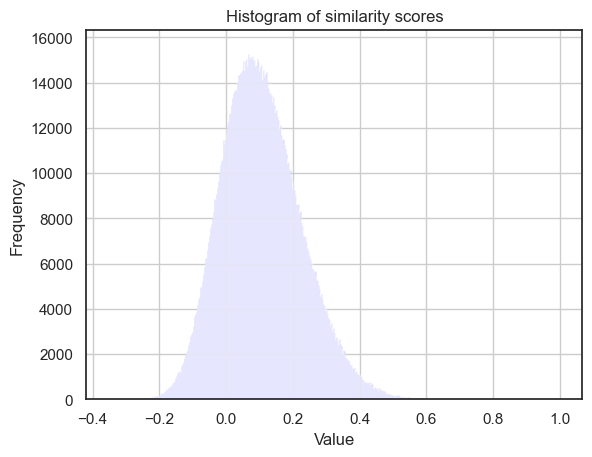

Average similarity score:  0.10652126

Top 10% similarity score:  0.365115761756897

Top 10 highest similarity score: [0.9747058  0.9747058  0.9841524  0.9841524  0.98746395 0.98746395
 0.9896744  0.9896744  0.9999126  0.9999126 ]

Max sim scores:  0.9999126


In [191]:
# Convert tensor to NumPy array
plot_sims = sim_scores[sim_scores < 0.999999].detach().flatten().numpy() # filter out values equal to 1 #OBS check more scietific way
# Plot histogram
plt.hist(plot_sims, bins=len(sim_scores), color='blue', alpha=0.2)
plt.title('Histogram of similarity scores')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Average similarity score: ", np.mean(plot_sims))
print("\nTop 10% similarity score: ", np.percentile(plot_sims, 97.5))
print("\nTop 10 highest similarity score:", np.sort(plot_sims)[-10:])
print("\nMax sim scores: ", np.max(plot_sims))

In [192]:
## Function for calculating confusion matrix scores


# False Positives = Number of instances belonging to the negative class but are classified as the positive class
# True Negatives = Number of instances belonging to the negative class that are correctly classsified as the negative class
# True positives: N instances belonging to the positive class that were also correctly classified as the positive class
# False negatives: N instances belonging to the positive class that were incorrectly classified to the negative class


def remove_probeid_in_classification(arr, value):
    for i, v in enumerate(arr):
        if v == value:
            return np.delete(arr, i)
    return arr  # Value not found in the array, return the original array

def confusion_matrix_scores(thold, simscores, im_ids):
    tps = []
    fps = []
    tns = []
    fns = []

    for i in range(0,len(sim_scores)):
        probe = im_ids[i]
        print(probe)
        
        # for probe i
        # Positive classification list
        classified_positive_list = sim_scores[i] >= thold
        classified_positive_idx = list(np.where(classified_positive_list)[0])
            
        # get the classified identities - positive
        face_idx_pos_class = im_ids[classified_positive_idx]
        #print("cor ids",face_idx_pos_class)
        
        # remove first instance of probe id in classification list
        face_idx_pos_class_filtered = remove_probeid_in_classification(face_idx_pos_class, probe)
        #print("filt, ids",face_idx_pos_class_filtered)

        
        # get TP
        tp = np.sum(face_idx_pos_class_filtered == probe)
        tps.append(tp)
        
        # get FP (classified as correct but not equal to probe)
        fp = len(face_idx_pos_class_filtered) - tp
        fps.append(fp)
        
        # Negative classification list
        classified_negative_list = sim_scores[i] < thold
        classified_negative_idx = list(np.where(classified_negative_list)[0])
        
        # get the classified identities - negative
        face_idx_neg_class = im_ids[classified_negative_idx]
        face_idx_neg_class_filtered = remove_probeid_in_classification(face_idx_neg_class, probe)


        # get TN (classified as false and not equal to probe)
        tn = np.sum(face_idx_neg_class_filtered != probe)
        tns.append(tn)
        
        # get FN (classified as false, but is actually equal to probe)
        fn = len(face_idx_neg_class_filtered) - tn
        fns.append(fn)
        
    return tps, fps, tns, fns


In [194]:
# children

## Threshold set based on studying the similarity scores
thold = np.percentile(plot_sims, 90)
im_ids = np.array(data["image_id"])

tps_c, fps_c, tns_c, fns_c = confusion_matrix_scores(thold, sim_scores, im_ids)

0
1
2
3
3
4
5
5
5
5
5
6
6
6
7
8
8
8
9
9
10
10
11
11
12
13
14
14
14
15
16
16
17
18
18
18
18
19
20
21
22
23
23
24
24
24
25
25
26
27
27
28
29
29
30
31
31
32
32
32
33
34
34
35
35
35
36
36
37
37
38
38
38
38
38
39
39
40
40
40
41
41
41
42
43
43
44
45
45
46
46
47
48
48
48
49
49
50
51
52
52
53
53
53
53
53
54
54
55
55
55
56
57
57
57
58
58
59
60
60
60
60
60
61
61
61
61
62
62
62
63
64
65
65
66
67
67
68
68
69
70
71
72
73
74
75
75
76
77
77
78
78
79
80
81
82
82
83
83
83
84
85
86
87
88
88
89
89
90
90
90
90
91
92
92
93
94
94
94
94
94
95
96
97
98
99
99
99
99
100
101
102
103
104
105
106
106
107
107
107
107
108
109
109
109
109
109
109
109
110
110
111
111
112
112
112
112
113
113
114
115
116
117
117
118
118
119
119
120
120
120
121
122
123
124
124
125
125
126
127
127
127
127
128
129
130
130
131
132
132
133
134
134
134
134
135
135
135
135
135
135
136
136
136
136
136
137
137
138
138
139
140
140
140
141
141
141
142
143
143
143
143
144
144
145
146
147
148
149
150
151
151
151
152
152
153
153
153
153
154
154
155
1

In [195]:
# adults

## Threshold set based on studying the similarity scores
thold = np.percentile(plot_sims, 90)
im_ids = np.array(data["image_id"])

tps_a, fps_a, tns_a, fns_a = confusion_matrix_scores(thold, simscores, im_ids):


SyntaxError: invalid syntax (2198411276.py, line 7)

##### FNIR

In [22]:
# FNIR = FN / (TP + FN)
fnir_children = np.sum(fns_c) / (np.sum(tps_c) + np.sum(fns_c))
print("FNIR children result: ", fnir_children)

fnir_adults = np.sum(fns_c) / (np.sum(tps_c) + np.sum(fns_c))
print("FNIR children result: ", fnir_adults)

FNIR result:  0.5294117647058824


##### FPIR

In [171]:
# FPIR = FP / (FP + TN)
fpir_children = np.sum(fps_c) / (np.sum(fps_c) + np.sum(tns_c))
print("FPIR children result: ", fpir_children)

fpir_adults = np.sum(fps_a) / (np.sum(fps_a) + np.sum(tns_a))
print("FPIR adults result: ", fpir_adults)

FPIR result:  0.030303030303030304


#### GARBE

Low value of alpha to put more weight on FND - rather capture more children than less

$$
\begin{aligned}
& F P D(\tau)=\left(\frac{n}{n-1}\right) \frac{\sum_i \sum_j\left|F P I R_{d_i}-F P I R_{d_j}\right|}{2 n^2 \overline{F P I R}} \forall d_i, d_j \in D \\
& F N D(\tau)=\left(\frac{n}{n-1}\right) \frac{\sum_i \sum_j\left|F N I R_{d_i}-F N I R_{d_j}\right|}{2 n^2 \overline{F N I R}} \forall d_i, d_j \in D
\end{aligned}
$$

$$
\operatorname{GARBE}(\tau)=\alpha F P D(\tau)+(1-\alpha) F N D(\tau)
$$

In [ ]:
fpir_avg = (fpir_children + fpir_adults) / 2
FPD = (np.abs(fpir_children - fpir_adults)) / fpir_avg
print("FPD result: ", FPD)

fnir_avg = (fnir_children + fnir_adults) / 2
FND = (np.abs(fnir_children - fnir_adults)) / fnir_avg
print("FND result: ", FND)

In [ ]:
alpha_val = 0.2
GARBE = alpha_val * FPD + (1 - alpha_val) * FND
print("GARBE result AdaFace: ", GARBE)